# EDA - Análisis Exploratorio de Datos para Rotación de Empleados

Análisis Exploratorio de Datos (EDA)
Este notebook explora el dataset de rotación de empleados de IBM para identificar patrones que expliquen la probabilidad de que un empleado abandone la empresa.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar dataset limpio
df = pd.read_csv("HR_Attrition_Cleaned.csv")
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

### Pregunta 1:
¿Qué impacto tiene el ingreso mensual (`MonthlyIncome`) combinado con el nivel del puesto (`JobLevel`) en la retención del personal?

Correlación entre MonthlyIncome y Attrition: -0.160
Correlación entre JobLevel y Attrition: -0.169


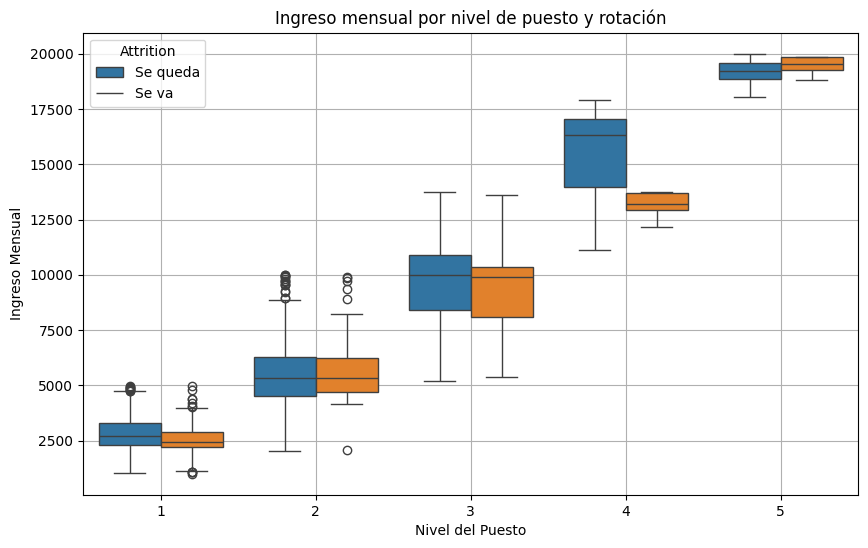

In [3]:

# %%
corr_income = df['MonthlyIncome'].corr(df['Attrition'])
corr_joblevel = df['JobLevel'].corr(df['Attrition'])
print(f"Correlación entre MonthlyIncome y Attrition: {corr_income:.3f}")
print(f"Correlación entre JobLevel y Attrition: {corr_joblevel:.3f}")

# %% [markdown]
# ### Ingreso promedio por grupo de rotación

# %%
income_by_attrition = df.groupby('Attrition')['MonthlyIncome'].mean()
income_by_attrition.index = income_by_attrition.index.map({0: 'Se queda', 1: 'Se va'})
income_by_attrition

# %% [markdown]
# ### Estadísticas combinadas por nivel de puesto

# %%
job_income_stats = df.groupby('JobLevel').agg({
    'MonthlyIncome': 'mean',
    'Attrition': 'mean'
}).rename(columns={'MonthlyIncome': 'AvgMonthlyIncome', 'Attrition': 'AttritionRate'})
job_income_stats

# %% [markdown]
# ### Visualización: Ingreso mensual por nivel de puesto y rotación

# %%
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='JobLevel', y='MonthlyIncome', hue='Attrition')
plt.title('Ingreso mensual por nivel de puesto y rotación')
plt.xlabel('Nivel del Puesto')
plt.ylabel('Ingreso Mensual')
plt.legend(title='Attrition', labels=['Se queda', 'Se va'])
plt.grid(True)
plt.show()


## Pregunta 2:
¿Influye el nivel de satisfacción laboral (`JobSatisfaction`) y la relación con los managers (`YearsWithCurrManager`) en la decisión de dejar la empresa?


Correlación entre JobSatisfaction y Attrition: -0.103
Correlación entre YearsWithCurrManager y Attrition: -0.156


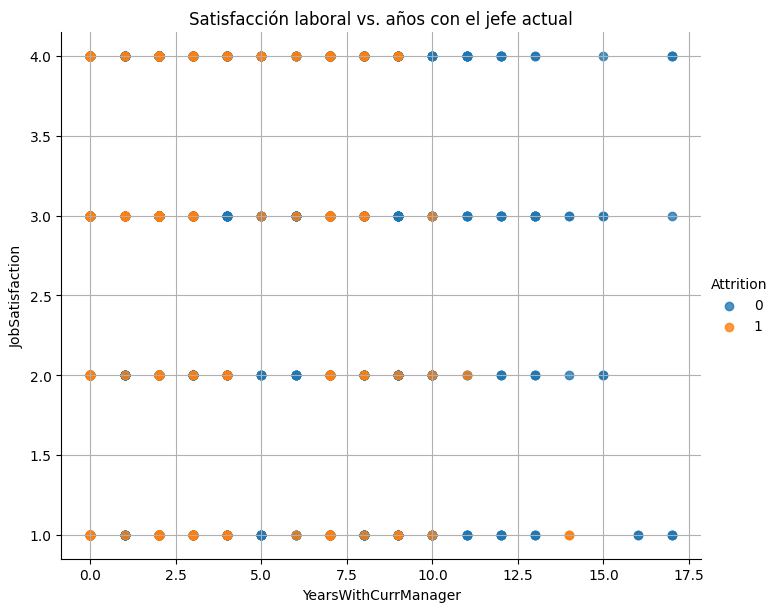

In [4]:
# Promedios de JobSatisfaction y YearsWithCurrManager según si se fueron o no
satisfaction_stats = df.groupby('Attrition')[['JobSatisfaction', 'YearsWithCurrManager']].mean()
satisfaction_stats.index = satisfaction_stats.index.map({0: 'Se queda', 1: 'Se va'})
satisfaction_stats

### Correlaciones con Attrition
corr_satisfaction = df['JobSatisfaction'].corr(df['Attrition'])
corr_manager = df['YearsWithCurrManager'].corr(df['Attrition'])
print(f"Correlación entre JobSatisfaction y Attrition: {corr_satisfaction:.3f}")
print(f"Correlación entre YearsWithCurrManager y Attrition: {corr_manager:.3f}")

# Visualización opcional de la relación cruzada
sns.lmplot(data=df, x='YearsWithCurrManager', y='JobSatisfaction', hue='Attrition', fit_reg=False, height=6, aspect=1.2)
plt.title('Satisfacción laboral vs. años con el jefe actual')
plt.grid(True)
plt.show()

## Pregunta 3:
¿Los empleados que hacen más viajes y trabajan horas extra (`OverTime`) rotan más, independientemente del salario?


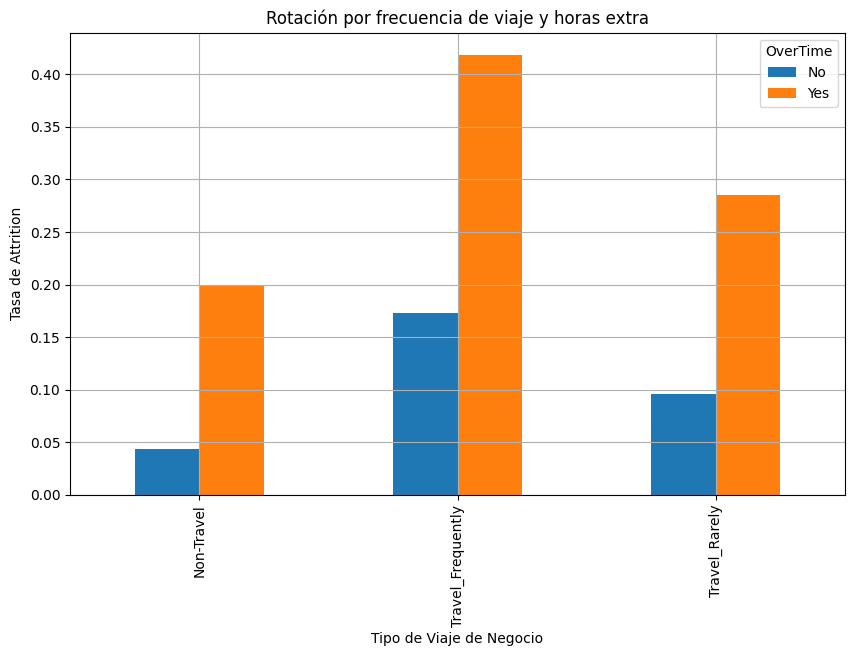

In [ ]:
# Ingreso promedio general
avg_income = df['MonthlyIncome'].mean()

# Promedio de ingreso para cada combinación BusinessTravel + OverTime
income_by_combo = df.groupby(['BusinessTravel', 'OverTime'])['MonthlyIncome'].mean().unstack()
income_by_combo['AverageIncome'] = income_by_combo.mean(axis=1)
income_by_combo['DeltaVsGlobal'] = income_by_combo['AverageIncome'] - avg_income

# Unir con tasa de rotación
rotation_rates = df.groupby(['BusinessTravel', 'OverTime'])['Attrition'].mean().unstack()

# Mostrar rotación y desviación de ingreso promedio
summary_combo = rotation_rates.copy()
summary_combo['IngresoPromedio'] = income_by_combo['AverageIncome']
summary_combo['DeltaIngresoVsGlobal'] = income_by_combo['DeltaVsGlobal']

# %% [markdown]
# A continuación se visualizan los patrones según combinación de viajes y horas extra.

# %%
combo_travel_overtime.plot(kind='bar', figsize=(10, 6))
plt.title('Rotación por frecuencia de viaje y horas extra')
plt.ylabel('Tasa de Attrition')
plt.xlabel('Tipo de Viaje de Negocio')
plt.grid(True)
plt.legend(title='OverTime')
plt.show()